In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit
from scipy.signal import lfilter


In [29]:
def gauss(x, mu, sigma):
    return np.exp(- (x - mu) ** 2 / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))

# Calibration

### Data will be trimmed for ..700 nm to ensure it is safe. That takes \[100:\] for all the data arrays.

In [30]:
data_blue = pd.read_csv('Calibration (bad)/blue.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))
data_blue['Total'] = (np.sqrt(data_blue['Red'].values) + np.sqrt(data_blue['Green'].values) + np.sqrt(data_blue['Blue'].values)) ** 2 

data_blue['Total'] /= np.max(data_blue['Total'])

n = 3  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

data_blue['Total_f'] = lfilter(b, a, data_blue['Total'])
data_blue['Total_f'] /= np.max(data_blue['Total_f'])
data_blue.head()

,Red,Green,Blue,Total,Total_f
0,0,2,0,0.003353,0.001156
1,0,2,0,0.003353,0.002312
2,0,0,0,0.000000,0.002312
3,0,0,0,0.000000,0.001156
4,0,2,0,0.003353,0.001156


In [31]:
BLUE_PEAK = np.argmax(data_blue['Total_f'])
BLUE_WAVE = 405
BLUE_PEAK

596

mu_blue, sigma_blue = curve_fit(gauss, np.arange(data_blue['Total'].values.size), data_blue['Total'].values)[0]

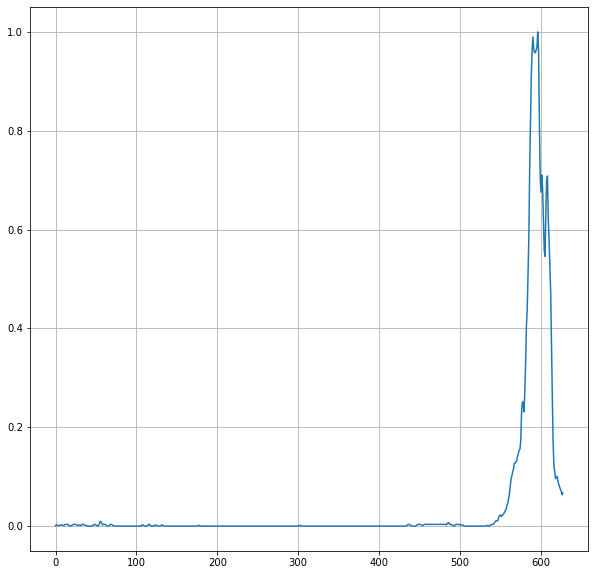

In [32]:
plt.figure(figsize=(10, 10))
plt.plot(data_blue['Total_f'])
#plt.plot(np.arange(data_blue['Total'].values.size), gauss(np.arange(data_blue['Total'].values.size), mu_blue, sigma_blue))
plt.grid()
plt.show()

In [33]:
data_red = pd.read_csv('Calibration (bad)/redrecaleb.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))
data_red['Total'] = (np.sqrt(data_red['Red'].values) + np.sqrt(data_red['Green'].values) + np.sqrt(data_red['Blue'].values)) ** 2 

data_red['Total'] /= np.max(data_red['Total'])

n = 3  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

data_red['Total_f'] = lfilter(b, a, data_red['Total'])
data_red['Total_f'] /= np.max(data_red['Total_f'])
data_red.head()

,Red,Green,Blue,Total,Total_f
0,0,2,0,0.005016,0.002035
1,0,2,0,0.005016,0.004070
2,0,2,0,0.005016,0.006105
3,0,2,0,0.005016,0.006105
4,0,0,0,0.000000,0.004070


In [34]:
RED_PEAK = np.argmax(data_red['Total_f'])
RED_WAVE = 632.8
RED_PEAK

68

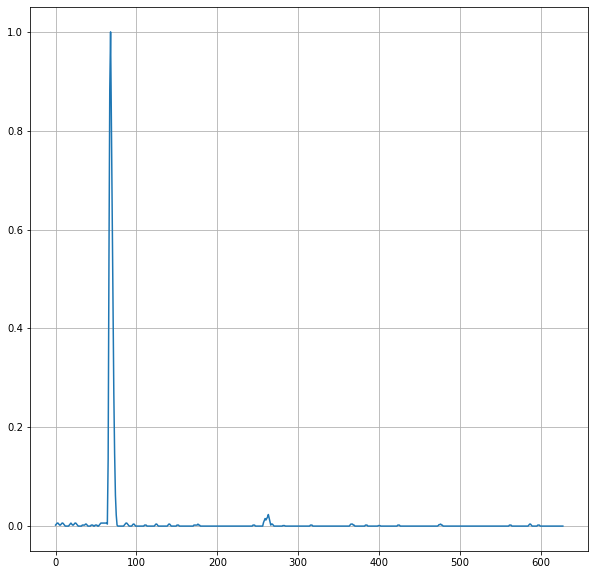

In [35]:
plt.figure(figsize=(10, 10))
plt.plot(data_red['Total_f'])
#plt.plot(np.arange(data_blue['Total'].values.size), gauss(np.arange(data_blue['Total'].values.size), mu_blue, sigma_blue))
plt.grid()
plt.show()

In [36]:
A = (RED_WAVE - BLUE_WAVE) / (RED_PEAK - BLUE_PEAK)
B = RED_WAVE - A * RED_PEAK
LEN = 628
A, B

(-0.43143939393939384, 662.1378787878788)

In [37]:
def recalibration(x, a=A, b=B):
    return a * x + b

In [38]:
x = recalibration(np.arange(628))

## Normal graphics

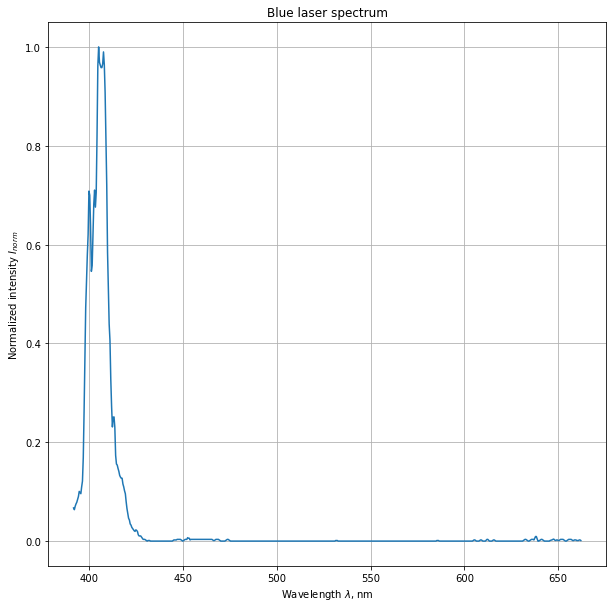

In [39]:
plt.figure(figsize=(10, 10))
plt.plot(x, data_blue['Total_f'])

plt.xlabel('Wavelength $\lambda$, nm')
plt.ylabel('Normalized intensity $I_{norm}$')

plt.title('Blue laser spectrum')

plt.grid()
plt.savefig('Pictures/bluelaser.pdf')
plt.show()

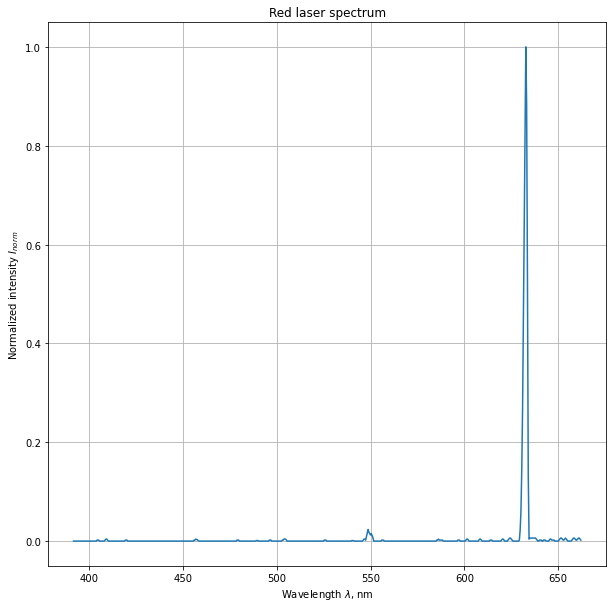

In [40]:
plt.figure(figsize=(10, 10))
plt.plot(x, data_red['Total_f'])

plt.xlabel('Wavelength $\lambda$, nm')
plt.ylabel('Normalized intensity $I_{norm}$')

plt.title('Red laser spectrum')

plt.grid()

plt.savefig('Pictures/redlaser.pdf')
plt.show()

## Ditches

### Empty

In [41]:
data_clear = pd.read_csv('Ditches/c_no_water.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))

n = 20  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

data_clear['Red'] = lfilter(b, a, data_clear['Red'])
data_clear['Green'] = lfilter(b, a, data_clear['Green'])
data_clear['Blue'] = lfilter(b, a, data_clear['Blue'])

data_clear['Red'] /= np.max(data_clear['Blue'])
data_clear['Green'] /= np.max(data_clear['Blue'])
data_clear['Blue'] /= np.max(data_clear['Blue'])

CLEAR = data_clear

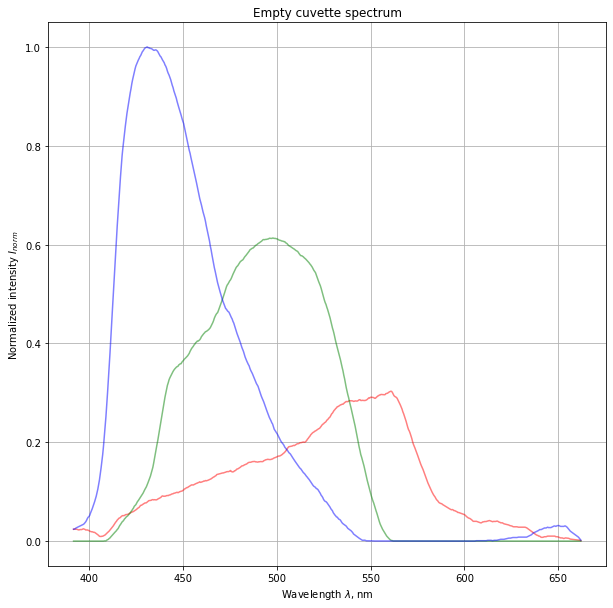

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(x, data_clear['Red'], c='red', alpha=0.5)
plt.plot(x, data_clear['Green'], c='green', alpha=0.5)
plt.plot(x, data_clear['Blue'], c='blue', alpha=0.5)

plt.xlabel('Wavelength $\lambda$, nm')
plt.ylabel('Normalized intensity $I_{norm}$')

plt.title('Empty cuvette spectrum')

plt.grid()
plt.show()

In [43]:
data_cocl3 = pd.read_csv('Ditches/c_cocl3.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))

n = 20  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

data_cocl3['Red'] = lfilter(b, a, data_cocl3['Red'])
data_cocl3['Green'] = lfilter(b, a, data_cocl3['Green'])
data_cocl3['Blue'] = lfilter(b, a, data_cocl3['Blue'])

data_cocl3['Red'] /= np.max(data_cocl3['Blue'])
data_cocl3['Green'] /= np.max(data_cocl3['Blue'])
data_cocl3['Blue'] /= np.max(data_cocl3['Blue'])

data_cocl3.head()

,Red,Green,Blue,Total
0,0.0,0.0,0.002656,1
1,0.0,0.0,0.005312,1
2,0.0,0.0,0.007968,1
3,0.0,0.0,0.010624,1
4,0.0,0.0,0.013280,1


In [44]:
data_cocl3['Red'] = data_cocl3['Red'].values / (CLEAR['Red'].values + int(1e-6))
data_cocl3['Green'] = data_cocl3['Green'].values / (CLEAR['Green'].values + 0.01)
data_cocl3['Blue'] = data_cocl3['Blue'].values / (CLEAR['Blue'].values + 0.01)

data_cocl3.head()

,Red,Green,Blue,Total
0,0.0,0.0,0.221167,1
1,0.0,0.0,0.378934,1
2,0.0,0.0,0.497146,1
3,0.0,0.0,0.589022,1
4,0.0,0.0,0.690149,1


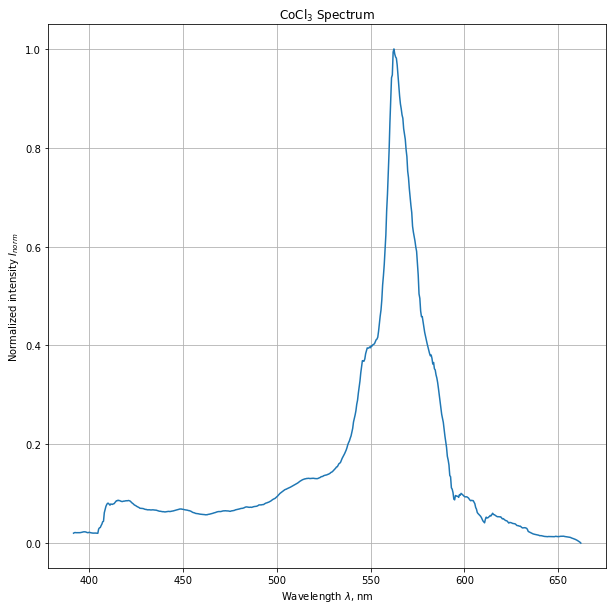

In [45]:
plt.figure(figsize=(10, 10))

a = (np.sqrt(data_cocl3['Red'].values) + np.sqrt(data_cocl3['Green'].values) + np.sqrt(data_cocl3['Blue'].values)) ** 2
a = np.interp(a, (a.min(), a.max()), (0, 1.))

#plt.plot(x, data_cocl3['Red'], c='red', alpha=0.5)
#plt.plot(x, data_cocl3['Green'], c='green', alpha=0.5)
#plt.plot(x, data_cocl3['Blue'], c='blue', alpha=0.5)

plt.plot(x, a)

plt.xlabel('Wavelength $\lambda$, nm')
plt.ylabel('Normalized intensity $I_{norm}$')

plt.title('CoCl$_3$ Spectrum')

plt.grid()
plt.savefig('Pictures/cocl3.pdf')
plt.show()

In [46]:
data_cuso4 = pd.read_csv('Ditches/c_blue.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))

n = 20  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

data_cuso4['Red'] = lfilter(b, a, data_cuso4['Red'])
data_cuso4['Green'] = lfilter(b, a, data_cuso4['Green'])
data_cuso4['Blue'] = lfilter(b, a, data_cuso4['Blue'])

data_cuso4['Red'] /= np.max(data_cuso4['Blue'])
data_cuso4['Green'] /= np.max(data_cuso4['Blue'])
data_cuso4['Blue'] /= np.max(data_cuso4['Blue'])

data_cuso4.head()

,Red,Green,Blue,Total
0,0.001606,0.0,0.0,2
1,0.003212,0.0,0.0,2
2,0.004818,0.0,0.0,2
3,0.006423,0.0,0.0,2
4,0.008029,0.0,0.0,2


In [47]:
data_cuso4['Red'] = data_cuso4['Red'].values / (CLEAR['Red'].values + int(1e-6))
data_cuso4['Green'] = data_cuso4['Green'].values / (CLEAR['Green'].values + 0.01)
data_cuso4['Blue'] = data_cuso4['Blue'].values / (CLEAR['Blue'].values + 0.01)

data_cuso4.head()

,Red,Green,Blue,Total
0,1.998107,0.0,0.0,2
1,1.998107,0.0,0.0,2
2,2.664143,0.0,0.0,2
3,3.196972,0.0,0.0,2
4,3.632922,0.0,0.0,2


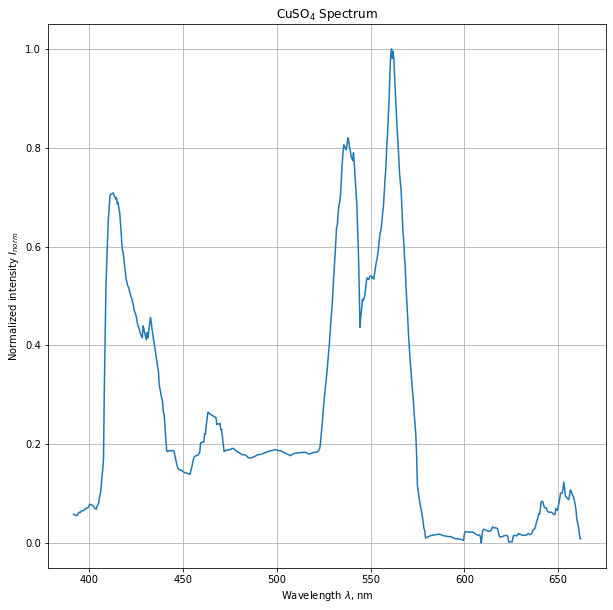

In [48]:
plt.figure(figsize=(10, 10))

#plt.plot(x, data_cuso4['Red'], c='red', alpha=0.5)
#plt.plot(x, data_cuso4['Green'], c='green', alpha=0.5)
#plt.plot(x, data_cuso4['Blue'], c='blue', alpha=0.5)

a = (np.sqrt(data_cuso4['Red'].values) + np.sqrt(data_cuso4['Green'].values) + np.sqrt(data_cuso4['Blue'].values)) ** 2
a = np.interp(a, (a.min(), a.max()), (0, 1.))

plt.plot(x, a)

plt.xlabel('Wavelength $\lambda$, nm')
plt.ylabel('Normalized intensity $I_{norm}$')

plt.title('CuSO$_4$ Spectrum')

plt.grid()

plt.savefig('Pictures/cuso4.pdf')
plt.show()

In [49]:
data = pd.read_csv('Ditches/c_k2cl2o7.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))

n = 20  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

data['Red'] = lfilter(b, a, data['Red'])
data['Green'] = lfilter(b, a, data['Green'])
data['Blue'] = lfilter(b, a, data['Blue'])

data['Red'] /= np.max(data['Blue'])
data['Green'] /= np.max(data['Blue'])
data['Blue'] /= np.max(data['Blue'])

data['Red'] = data['Red'].values / (CLEAR['Red'].values + int(1e-6))
data['Green'] = data['Green'].values / (CLEAR['Green'].values + 0.01)
data['Blue'] = data['Blue'].values / (CLEAR['Blue'].values + 0.01)

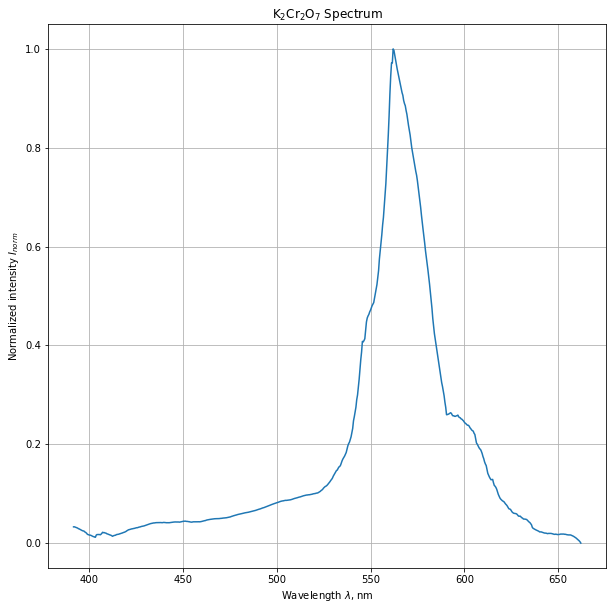

In [50]:
plt.figure(figsize=(10, 10))

#plt.plot(x, data_cuso4['Red'], c='red', alpha=0.5)
#plt.plot(x, data_cuso4['Green'], c='green', alpha=0.5)
#plt.plot(x, data_cuso4['Blue'], c='blue', alpha=0.5)

a = (np.sqrt(data['Red'].values) + np.sqrt(data['Green'].values) + np.sqrt(data['Blue'].values)) ** 2
a = np.interp(a, (a.min(), a.max()), (0, 1.))

plt.plot(x, a)

plt.xlabel('Wavelength $\lambda$, nm')
plt.ylabel('Normalized intensity $I_{norm}$')

plt.title('K$_2$Cr$_2$O$_7$ Spectrum')

plt.grid()
plt.savefig('Pictures/k2cr2o7.pdf')
plt.show()

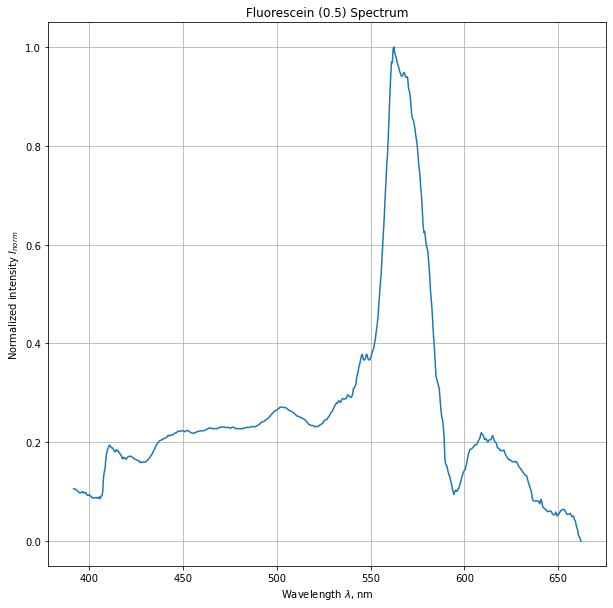

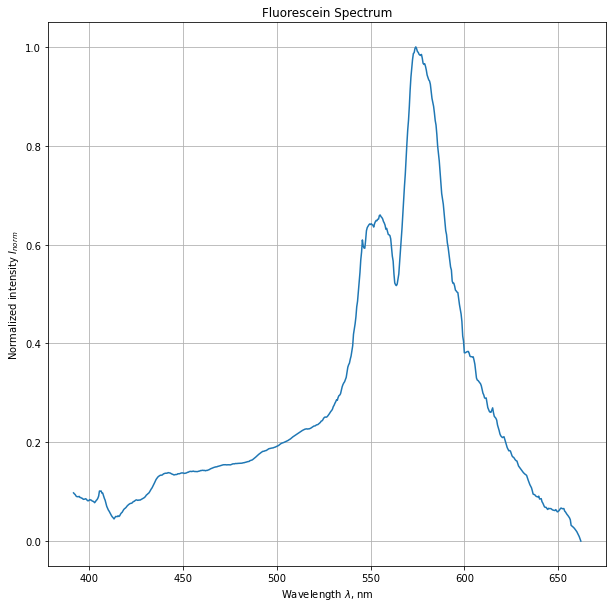

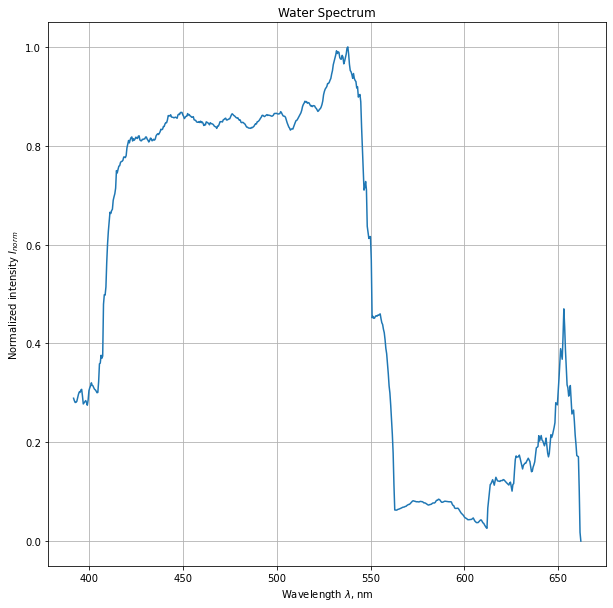

In [51]:
main_dict = {'c_yellow':'Fluorescein', 'c_lime':'Fluorescein (0.5)', 'c_clear':'Water'}

for file in ('c_lime', 'c_yellow', 'c_clear'):
    data = pd.read_csv('Ditches/{}.txt'.format(file), sep='\t', names=('Red', 'Green', 'Blue', 'Total'))

    n = 20  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1

    data['Red'] = lfilter(b, a, data['Red'])
    data['Green'] = lfilter(b, a, data['Green'])
    data['Blue'] = lfilter(b, a, data['Blue'])

    data['Red'] /= np.max(data['Blue'])
    data['Green'] /= np.max(data['Blue'])
    data['Blue'] /= np.max(data['Blue'])

    data['Red'] = data['Red'].values / (CLEAR['Red'].values + int(1e-6))
    data['Green'] = data['Green'].values / (CLEAR['Green'].values + 0.01)
    data['Blue'] = data['Blue'].values / (CLEAR['Blue'].values + 0.01)

    plt.figure(figsize=(10, 10))

    #plt.plot(x, data_cuso4['Red'], c='red', alpha=0.5)
    #plt.plot(x, data_cuso4['Green'], c='green', alpha=0.5)
    #plt.plot(x, data_cuso4['Blue'], c='blue', alpha=0.5)

    a = (np.sqrt(data['Red'].values) + np.sqrt(data['Green'].values) + np.sqrt(data['Blue'].values) ) ** 2
    a = np.interp(a, (a.min(), a.max()), (0, 1.))

    plt.plot(x, a)

    plt.xlabel('Wavelength $\lambda$, nm')
    plt.ylabel('Normalized intensity $I_{norm}$')

    plt.title('{} Spectrum'.format(main_dict[file]))

    plt.grid()
    plt.savefig('Pictures/'+ file + '.pdf')
    plt.show()

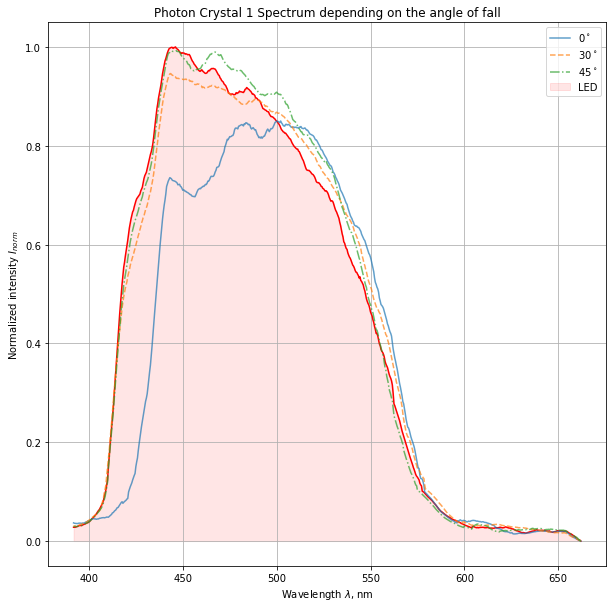

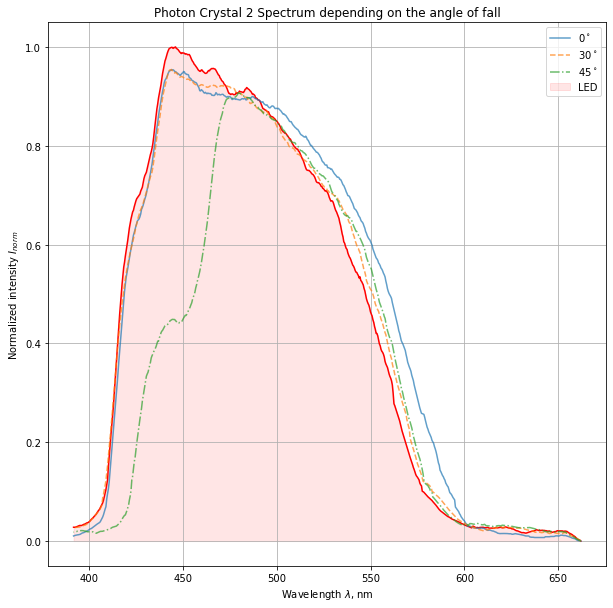

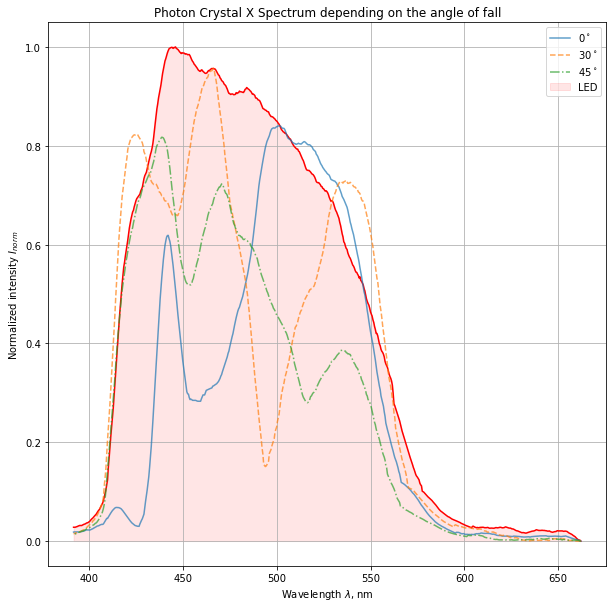

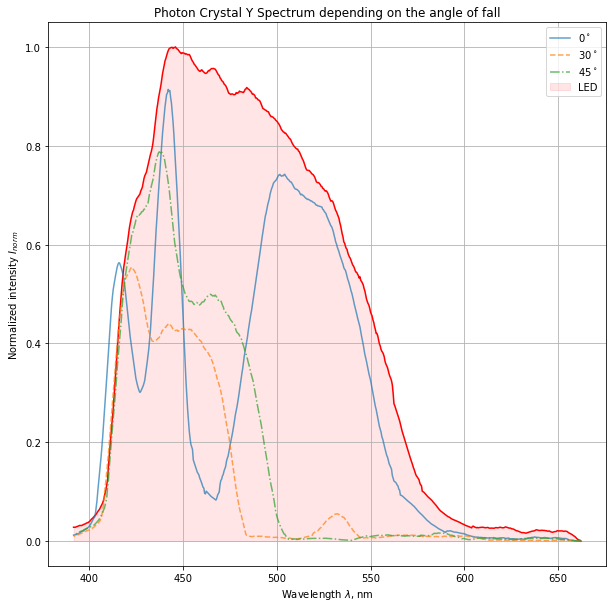

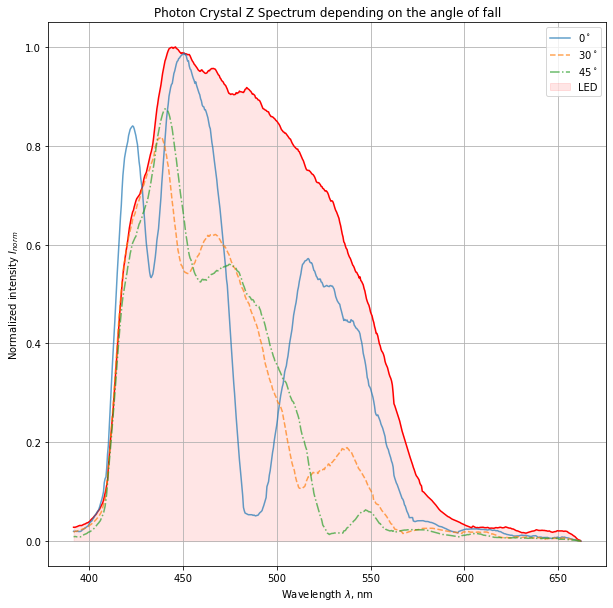

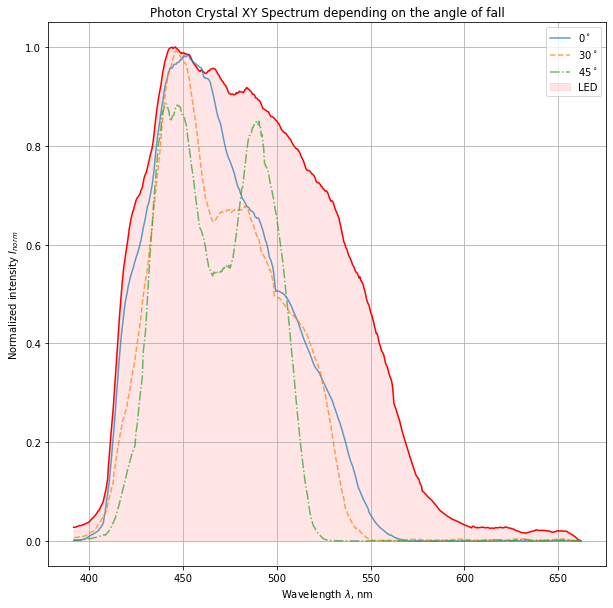

In [52]:
for crystal in ('1', '2', 'x', 'y', 'z', 'xy'):

    plt.figure(figsize=(10, 10))

    main_dict = {'perp':'0$^\circ$', '30':'30$^\circ$', '45':'45$^\circ$'}
    sup_dict = {'perp':'-', '30':'--', '45':'-.'}

    # LED adding

    data = pd.read_csv('LED.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))

    n = 20  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1

    data['Red'] = lfilter(b, a, data['Red'])
    data['Green'] = lfilter(b, a, data['Green'])
    data['Blue'] = lfilter(b, a, data['Blue'])

    data['Red'] /= np.max(data['Blue'])
    data['Green'] /= np.max(data['Blue'])
    data['Blue'] /= np.max(data['Blue'])

    #data['Red'] = data['Red'].values / (CLEAR['Red'].values + int(1e-6))
    #data['Green'] = data['Green'].values / (CLEAR['Green'].values + 0.01)
    #data['Blue'] = data['Blue'].values / (CLEAR['Blue'].values + 0.01)

    a = (np.sqrt(data['Red'].values) + np.sqrt(data['Green'].values) + np.sqrt(data['Blue'].values)) ** 2
    la = np.interp(a, (a.min(), a.max()), (0, 1.))

    plt.plot(x, la, color='red')
    plt.fill_between(x, la, alpha=0.1, color='red', label='LED')

    for part in ('perp', '30', '45'):
        data = pd.read_csv('Photon Crystals/{}.txt'.format(crystal + '_' + part), sep='\t', names=('Red', 'Green', 'Blue', 'Total'))

        n = 20  # the larger n is, the smoother curve will be
        b = [1.0 / n] * n
        a = 1

        data['Red'] = lfilter(b, a, data['Red'])
        data['Green'] = lfilter(b, a, data['Green'])
        data['Blue'] = lfilter(b, a, data['Blue'])

        data['Red'] /= np.max(data['Blue'])
        data['Green'] /= np.max(data['Blue'])
        data['Blue'] /= np.max(data['Blue'])

        #data['Red'] = data['Red'].values / (CLEAR['Red'].values + int(1e-6))
        #data['Green'] = data['Green'].values / (CLEAR['Green'].values + 0.01)
        #data['Blue'] = data['Blue'].values / (CLEAR['Blue'].values + 0.01)

        a = (np.sqrt(data['Red'].values) + np.sqrt(data['Green'].values) + np.sqrt(data['Blue'].values)) ** 2
        a = np.interp(a, (a.min(), a.max()), (0, 1.))

        max_ = a.argmax()

        if (recalibration(max_) < 450):
            max_ = 10 + max_ + a[max_ + 10:].argmax()
        a = a / a.max() * la[max_]
    



        plt.plot(x, a, sup_dict[part], alpha=0.7, label=main_dict[part])

    

    plt.xlabel('Wavelength $\lambda$, nm')
    plt.ylabel('Normalized intensity $I_{norm}$')
    plt.title('Photon Crystal {} Spectrum depending on the angle of fall'.format(crystal.upper()))
    plt.grid()
    plt.legend()
    plt.savefig('Pictures/Photon Crystals pictures/' + crystal + '.pdf')

    plt.show()

In [53]:
data = pd.read_csv('Hg lamp/hg_1.txt', sep='\t', names=('Red', 'Green', 'Blue', 'Total'))

n = 20  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

data['Red'] = lfilter(b, a, data['Red'])
data['Green'] = lfilter(b, a, data['Green'])
data['Blue'] = lfilter(b, a, data['Blue'])

data['Red'] /= np.max(data['Blue'])
data['Green'] /= np.max(data['Blue'])
data['Blue'] /= np.max(data['Blue'])

data['Red'] = data['Red'].values / (CLEAR['Red'].values + int(1e-6))
data['Green'] = data['Green'].values / (CLEAR['Green'].values + 0.01)
data['Blue'] = data['Blue'].values / (CLEAR['Blue'].values + 0.01)

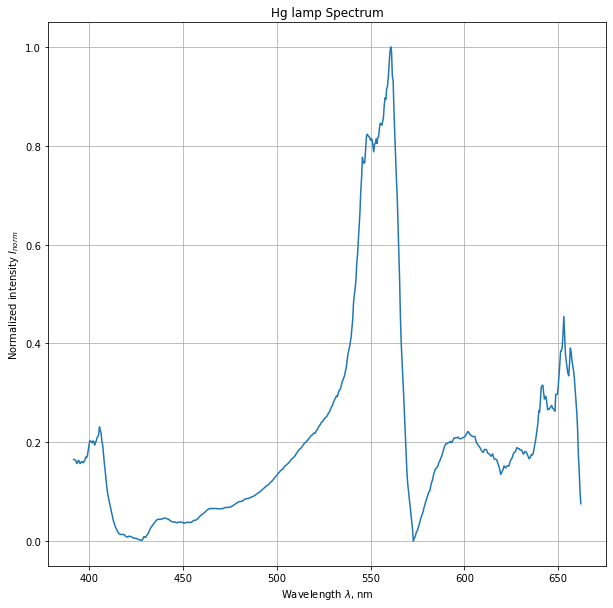

In [54]:
plt.figure(figsize=(10, 10))

#plt.plot(x, data_cuso4['Red'], c='red', alpha=0.5)
#plt.plot(x, data_cuso4['Green'], c='green', alpha=0.5)
#plt.plot(x, data_cuso4['Blue'], c='blue', alpha=0.5)

a = (np.sqrt(data['Red'].values) + np.sqrt(data['Green'].values) + np.sqrt(data['Blue'].values)) ** 2
a = np.interp(a, (a.min(), a.max()), (0, 1.))

plt.plot(x, a)

plt.xlabel('Wavelength $\lambda$, nm')
plt.ylabel('Normalized intensity $I_{norm}$')

plt.title('Hg lamp Spectrum')

plt.grid()
plt.savefig('Pictures/Hg.pdf')
plt.show()